In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
data = pd.read_csv('data/titanic_withEncoded.csv')

In [14]:
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [16]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(random_state=1, C=1).fit(X_train_std, y_train)

In [34]:
final_score = clf.score(X_test_std, y_test)
print('Score: {}'.format(final_score))

Score: 0.792


In [35]:
from sklearn.model_selection import learning_curve

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X_train_std,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

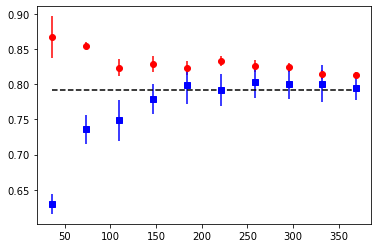

In [43]:
train_score_mean = np.mean(train_scores, axis=1)
train_score_error = np.std(train_scores, axis=1) / np.sqrt(len(train_scores[0]))

test_score_mean = np.mean(test_scores, axis=1)
test_score_error = np.std(test_scores, axis=1) / np.sqrt(len(test_scores[0]))

plt.errorbar(train_sizes, train_score_mean, yerr=train_score_error, color='r', linestyle='none', marker='o')
plt.errorbar(train_sizes, test_score_mean, yerr=test_score_error, color='b', linestyle='none', marker='s')

plt.plot((train_sizes[0], train_sizes[-1]), (final_score, final_score), linestyle='--', color='k')